# Data Science Research of The PAMAP2 Physical Activity Monitoring Dataset

# Overview

For this assignment, PAMAP2 Physical Activity Monitoring Dataset is used. This dataset contains data of 3 inertial measurement units and a heart rate monitor of 9 different subjects(1 female and 8 male) performing 18 various physical activities(running,rope jumping, lying etc) and the readings related to their hand,chest and ankle were noted down.

# Source of dataset

The readings of individual subject is stored as text file in .dat format. This text file contains readings of 54 different attributes(including timestamp, activity ID, heart rate and IMU sensory data).

# Outcome

The goal is to develop hardware and/or software which can determine the amount (using start/end times and heart rates) and type of physical activity carried out by an individual

Specific Requirements

You are required to:

1. carry out thorough exploratory data analysis and appropriately handle missing or dirty data;
2. develop and test at least one hypothesis for a relationship between a single pair of attributes;
3. develop and test at least one model which uses multiple attributes to make predictions.

# Introduction
This report focuses on data analysis steps performed on  the data of each individual. The PAMAP2 Physical Activity Monitoring Dataset will be analysed to develop hardware and/or software which can determine the amount (using start/end times and heart rates) and type of physical activity carried out by an individual. So I would go through various steps to perform data analysis and analyse the chest measurements and heartrate.

In the first step of data analysis, I will read and analyse data of description of activities and the readings of different inertial measurement of the subjects while carrying out the activities. Then I will load all the readings of the each subject into a single dataframe. In second step I will perform data cleaning in the obtained dataframe to handle missing values, data normalization etc.

In the next step, I will perform the exploratory data analysis to obtain relationship of activity Id with different attributes(like heartrate, chest magnetometer etc). After EDA, I will state an hypothesis and perform hypothesis testing for the stated hypothesis. 

In the last step, I will build a model to predict heartrate and the activity Id from multiple readings of the chest after analysing the correlation of the data.

# Content

Initial steps of importing all the required libraries and loading data from the list of files.

Data Cleaning:

    Function : data_cleaning()
               Sub-Function :fill_null_heartrate() :- replace Null values of heart rate column
               
Exploratory Data Analysis:

    Train,Test data splitting
    Function : train_test_splitting() :- Splitting into train and test set
    
    Correlation through heatmap
    Function : genrate_heatmap() :- Generate Heat-Map
    
    Time and activity Analysis with respect to the actvities undertaken by each subject
    Function : elapsedtime_heartrate() :- Estimating Elapsed Time and mean heart rate for each subject and
                their corresponding activities
  
               Sub-Function : change_milllisec() :- convert calculated elapsedtime to seconds
               
    Function : plot_scatter() :- Plotting a scatter plot between mean heart rate and elapsedtime(sec)
    
    Activity Heartrate Analysis
    Function: activity_heartrate() :- Analyse the heart rate for each activity for a subject at time
    
    
Hypothesis Testing:

    Hypothesis stated : A hypothesis of dependency between activity and human heartrate fluctiations.
    Function : con_cat() :- perform concatenation as per the requirement hypothesis testing
    Function : t_test()  :- Perform t-test
    Function : hypo_test() :- Result based on t-test()

Modelling :


# Data Reading

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
import scipy.stats as stats 
%matplotlib inline
from sklearn.model_selection import train_test_split
import sklearn.model_selection as cross_validation

Here a list of files(list_of_files) is created to read and load the .dat file into single dataframe. A dictionary activityIDdict is created which maps each activityId with associated activity name so we can use the name in the further steps of processing. Then list of hand, chest and ankle inertial measurement units(IMU) are made to so as to have column names for the obtained dataframe. There will be total of 54 IMU which means 54 columnns in the dataframe.

In [2]:
# Load data
list_of_files = ['Dataset/Protocol/subject101.dat',
                 'Dataset/Protocol/subject102.dat',
                 'Dataset/Protocol/subject103.dat',
                 'Dataset/Protocol/subject104.dat',
                 'Dataset/Protocol/subject105.dat',
                 'Dataset/Protocol/subject106.dat',
                 'Dataset/Protocol/subject107.dat',
                 'Dataset/Protocol/subject108.dat',
                 'Dataset/Protocol/subject109.dat' ]

subjectID = [1,2,3,4,5,6,7,8,9]

activityIDdict = {0: 'transient',
              1: 'lying',
              2: 'sitting',
              3: 'standing',
              4: 'walking',
              5: 'running',
              6: 'cycling',
              7: 'Nordic_walking',
              9: 'watching_TV',
              10: 'computer_work',
              11: 'car driving',
              12: 'ascending_stairs',
              13: 'descending_stairs',
              16: 'vacuum_cleaning',
              17: 'ironing',
              18: 'folding_laundry',
              19: 'house_cleaning',
              20: 'playing_soccer',
              24: 'rope_jumping' }
              
colNames = ["timestamp", "activityID","heartrate"]

IMUhand = ['handTemperature', 
           'hand_acc16_1', 'hand_acc16_2', 'hand_acc16_3', 
           'hand_acc6_1', 'hand_acc6_2', 'hand_acc6_3', 
           'hand_gyro1', 'hand_gyro2', 'hand_gyro3', 
           'hand_magne1', 'hand_magne2', 'hand_magne3',
           'hand_orientation1', 'hand_orientation2', 'hand_orientation3', 'hand_orientation4']

IMUchest = ['chestTemperature', 
           'chest_acc16_1', 'chest_acc16_2', 'chest_acc16_3', 
           'chest_acc6_1', 'chest_acc6_2', 'chest_acc6_3', 
           'chest_gyro1', 'chest_gyro2', 'chest_gyro3', 
           'chest_magne1', 'chest_magne2', 'chest_magne3',
           'chest_orientation1', 'chest_orientation2', 'chest_orientation3', 'chest_orientation4']

IMUankle = ['ankleTemperature', 
           'ankle_acc16_1', 'ankle_acc16_2', 'ankle_acc16_3', 
           'ankle_acc6_1', 'ankle_acc6_2', 'ankle_acc6_3', 
           'ankle_gyro1', 'ankle_gyro2', 'ankle_gyro3', 
           'ankle_magne1', 'ankle_magne2', 'ankle_magne3',
           'ankle_orientation1', 'ankle_orientation2', 'ankle_orientation3', 'ankle_orientation4']

columns = colNames + IMUhand + IMUchest + IMUankle  #all columns in one list



In [3]:
def create_dataframe(list_of_files):
    datafr = pd.DataFrame()
    for file in list_of_files:
        #procData = pd.read_table(file, header=None, sep='\s+')
        df = pd.read_csv(file,sep='\s+|\s+',engine='python')
        strfile=file[17:27]+'.csv'
        df.to_csv(strfile, index=None)
        phydf=pd.read_csv(strfile)
        phydf.columns = columns
        phydf['subject_id'] = int(file[-5])
        #dataCollection = dataCollection.append(procData, ignore_index=True)
        datafr=pd.concat([datafr, phydf], ignore_index=True)
    return datafr

datafr=create_dataframe(list_of_files)
#dataCollection.reset_index(drop=True, inplace=True)
datafr.reset_index(drop=True, inplace=True)
#dataCollection.head()
datafr.head(10)

,timestamp,activityID,heartrate,handTemperature,hand_acc16_1,hand_acc16_2,hand_acc16_3,hand_acc6_1,hand_acc6_2,hand_acc6_3,...,ankle_gyro2,ankle_gyro3,ankle_magne1,ankle_magne2,ankle_magne3,ankle_orientation1,ankle_orientation2,ankle_orientation3,ankle_orientation4,subject_id
0,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,1
1,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,1
2,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,1
3,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,1
4,8.43,0,NaN,30.0,2.29959,8.82929,3.54710,2.26132,8.65762,3.77788,...,-0.016024,0.001050,-60.2954,-38.8778,-58.3977,1.0,0.0,0.0,0.0,1
5,8.44,0,NaN,30.0,2.33738,8.82900,3.54767,2.27703,8.77828,3.73230,...,-0.053934,0.015594,-60.6307,-38.8676,-58.2711,1.0,0.0,0.0,0.0,1
6,8.45,0,NaN,30.0,2.37142,9.05500,3.39347,2.39786,8.89814,3.64131,...,-0.039937,-0.000785,-60.5171,-38.9819,-58.2733,1.0,0.0,0.0,0.0,1
7,8.46,0,NaN,30.0,2.33951,9.13251,3.54668,2.44371,8.98841,3.62596,...,-0.010042,0.017701,-61.2916,-39.6182,-58.1499,1.0,0.0,0.0,0.0,1
8,8.47,0,NaN,30.0,2.25966,9.09415,3.43015,2.42877,9.01871,3.61081,...,-0.013923,0.014498,-60.8509,-39.0821,-58.1478,1.0,0.0,0.0,0.0,1
9,8.48,0,104.0,30.0,2.29745,8.90450,3.46984,2.39736,8.94335,3.53551,...,0.002283,0.020352,-61.5302,-38.7240,-58.3860,1.0,0.0,0.0,0.0,1


# Data Cleaning

Here in data cleaning we will be focusing on four steps:

  i) removing the rows with activityID=0: For further analysis I won't be considering the activities with activityID = 0 as the      subjects are not doing any task.

  ii) dropping the irrelevant columns: Going further, I won't require any of the orientation columns for analysis so I will           remove those columns .

  iii) converting values into numeric value: Since our data is all about different readings which are recorded in number type I       will be converting all the values which are in non numeric format into numeric type

  iv) removal of null values: Here to remove all the null values, I will use interpolate function. Since in  the dataset records       the reading is taken every millisecond and the various IMU reading won't change drastically so I will assume the null           value will be similar to the above row.

In [10]:
def data_cleaning(datafr):
    #function : data_cleaning : perform all the datacleaing activites
    #parameter : datafr : dataframe
    
    dataout = datafr.drop(datafr[datafr['activityID'] == 0].index)
    dataout=datafr.drop(['hand_orientation1','hand_orientation2','hand_orientation3','hand_orientation4','chest_orientation1',
            'chest_orientation2','chest_orientation3','chest_orientation4','ankle_orientation1','ankle_orientation2',
            'ankle_orientation3','ankle_orientation4'],axis=1)
    dataout=datafr.apply(pd.to_numeric,errors='coerce')
    dataout=datafr.interpolate()
    
    return datafr

# Data Cleaning process: data_cleaning():

Parameters passed(Input)-dataframe(datafr) to be cleaned created after reading the data

Output- returns dataframe(dataout) in which all the above mentioned steps are performed

Functions used:

i) drop(datafr[datafr['activityID'] == 0])-removing the rows with activityID=0

ii)drop()- dropping the irrelevant columns

iii) pd.to_numeric()-converting values into numeric value

iv)interpolate()-removal of null values



In [12]:
phydata=data_cleaning(datafr)
phydata

,timestamp,activityID,heartrate,handTemperature,hand_acc16_1,hand_acc16_2,hand_acc16_3,hand_acc6_1,hand_acc6_2,hand_acc6_3,...,ankle_acc6_1,ankle_acc6_2,ankle_acc6_3,ankle_gyro1,ankle_gyro2,ankle_gyro3,ankle_magne1,ankle_magne2,ankle_magne3,subject_id
2927,37.66,1,NaN,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,...,9.63162,-1.76757,0.265761,0.002908,-0.027714,0.001752,-61.1081,-36.863600,-58.369600,1
2928,37.67,1,NaN,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,...,9.58649,-1.75247,0.250816,0.020882,0.000945,0.006007,-60.8916,-36.319700,-58.365600,1
2929,37.68,1,NaN,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,...,9.60196,-1.73721,0.356632,-0.035392,-0.052422,-0.004882,-60.3407,-35.784200,-58.611900,1
2930,37.69,1,NaN,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,...,9.58674,-1.78264,0.311453,-0.032514,-0.018844,0.026950,-60.7646,-37.102800,-57.879900,1
2931,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,...,9.64677,-1.75240,0.295902,0.001351,-0.048878,-0.006328,-60.2040,-37.122500,-57.884700,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872006,95.06,24,162.0,25.125,4.99466,6.01881,5.59830,4.90787,6.05780,5.68357,...,9.41274,-2.26922,-1.759580,0.021288,-0.012885,0.005878,-45.7855,-0.831734,-0.170139,9
2872007,95.07,24,162.0,25.125,5.02764,5.90369,5.48372,4.89090,5.95209,5.56301,...,9.33733,-2.23908,-1.834950,0.010715,0.003629,-0.004235,-46.0331,-0.817288,0.538134,9
2872008,95.08,24,162.0,25.125,5.06409,5.71370,5.48491,4.97981,5.87584,5.45738,...,9.32243,-2.23905,-1.804610,-0.016939,-0.035176,-0.002309,-45.5140,-1.229410,0.540438,9
2872009,95.09,24,162.0,25.125,5.13914,5.63724,5.48629,4.97690,5.69448,5.29167,...,9.38220,-2.26938,-1.880500,-0.028069,-0.036457,-0.007076,-45.9093,-0.565555,0.680109,9


In [ ]:
phydata.isnull().sum()

But since the top row will still have Nan values in heartrate we can see that the values should be 100 for the activityID=1 should be 100 so I filled the values with 100 in Nan value

In [13]:
phydata=phydata.fillna(100)
phydata.head()

,timestamp,activityID,heartrate,handTemperature,hand_acc16_1,hand_acc16_2,hand_acc16_3,hand_acc6_1,hand_acc6_2,hand_acc6_3,...,ankle_acc6_1,ankle_acc6_2,ankle_acc6_3,ankle_gyro1,ankle_gyro2,ankle_gyro3,ankle_magne1,ankle_magne2,ankle_magne3,subject_id
2927,37.66,1,100.0,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,...,9.63162,-1.76757,0.265761,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,1
2928,37.67,1,100.0,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,...,9.58649,-1.75247,0.250816,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656,1
2929,37.68,1,100.0,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,...,9.60196,-1.73721,0.356632,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,1
2930,37.69,1,100.0,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,...,9.58674,-1.78264,0.311453,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799,1
2931,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,...,9.64677,-1.75240,0.295902,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1


In [14]:
phydata.isnull().sum()

timestamp           0
activityID          0
heartrate           0
handTemperature     0
hand_acc16_1        0
hand_acc16_2        0
hand_acc16_3        0
hand_acc6_1         0
hand_acc6_2         0
hand_acc6_3         0
hand_gyro1          0
hand_gyro2          0
hand_gyro3          0
hand_magne1         0
hand_magne2         0
hand_magne3         0
chestTemperature    0
chest_acc16_1       0
chest_acc16_2       0
chest_acc16_3       0
chest_acc6_1        0
chest_acc6_2        0
chest_acc6_3        0
chest_gyro1         0
chest_gyro2         0
chest_gyro3         0
chest_magne1        0
chest_magne2        0
chest_magne3        0
ankleTemperature    0
ankle_acc16_1       0
ankle_acc16_2       0
ankle_acc16_3       0
ankle_acc6_1        0
ankle_acc6_2        0
ankle_acc6_3        0
ankle_gyro1         0
ankle_gyro2         0
ankle_gyro3         0
ankle_magne1        0
ankle_magne2        0
ankle_magne3        0
subject_id          0
dtype: int64

In [15]:
phydata.reset_index(drop = True, inplace = True)
phydata.head(10)

,timestamp,activityID,heartrate,handTemperature,hand_acc16_1,hand_acc16_2,hand_acc16_3,hand_acc6_1,hand_acc6_2,hand_acc6_3,...,ankle_acc6_1,ankle_acc6_2,ankle_acc6_3,ankle_gyro1,ankle_gyro2,ankle_gyro3,ankle_magne1,ankle_magne2,ankle_magne3,subject_id
0,37.66,1,100.0,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,...,9.63162,-1.76757,0.265761,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,1
1,37.67,1,100.0,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,...,9.58649,-1.75247,0.250816,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656,1
2,37.68,1,100.0,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,...,9.60196,-1.73721,0.356632,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,1
3,37.69,1,100.0,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,...,9.58674,-1.78264,0.311453,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799,1
4,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,...,9.64677,-1.75240,0.295902,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1
5,37.71,1,100.0,30.375,2.07165,7.25965,6.01218,2.19238,7.21038,6.01604,...,9.60177,-1.75239,0.311276,0.003793,-0.026906,0.004125,-61.3257,-36.9744,-57.7501,1
6,37.72,1,100.0,30.375,2.41148,7.59780,5.93915,2.23988,7.46679,6.03053,...,9.67694,-1.76748,0.326060,0.036814,-0.032277,-0.006866,-61.5520,-36.9632,-57.9957,1
7,37.73,1,100.0,30.375,2.32815,7.63431,5.70686,2.31663,7.64745,6.01495,...,9.61685,-1.76749,0.326380,-0.010352,-0.016621,0.006548,-61.5738,-36.1724,-59.3487,1
8,37.74,1,100.0,30.375,2.25096,7.78598,5.62821,2.28637,7.70801,5.93935,...,9.61686,-1.72212,0.326234,0.039346,0.020393,-0.011880,-61.7741,-37.1744,-58.1199,1
9,37.75,1,100.0,30.375,2.14107,7.52262,5.78141,2.31538,7.72276,5.78828,...,9.63189,-1.70699,0.326105,0.029874,-0.010763,0.005133,-60.7680,-37.4206,-58.8735,1


# Conclusion of Data Cleaning

After doing data cleaning we got a dataframe(phydata) which we will use in the further steps of data analysis. 

# Exploratory Data Analysis

Here we will plot different graph for different readings.

Parameters passed: dataframe(phydata) which we got as output data cleaning
Output: we will plot different graphs for different data

Process:
Splitting into Test and Train set
Correlation analysis

# Splitting into Test and Train set

I will be splitting data into test and training sets in the ratio of 0.5. So we are dividing the test and train into two equal halves.

In [16]:
def splitting_train_test(dataframe,n=0.5):
    train_df = dataframe.sample(frac=n, random_state=1)
    test_df = dataframe.drop(train_df.index)
    return train_df,test_df

In [28]:
train_df,test_df = splitting_train_test(phydata,0.5)

In [29]:
train_df.describe()

,timestamp,activityID,heartrate,handTemperature,hand_acc16_1,hand_acc16_2,hand_acc16_3,hand_acc6_1,hand_acc6_2,hand_acc6_3,...,ankle_acc6_1,ankle_acc6_2,ankle_acc6_3,ankle_gyro1,ankle_gyro2,ankle_gyro3,ankle_magne1,ankle_magne2,ankle_magne3,subject_id
count,971436.000000,971436.000000,971436.000000,971436.000000,971436.000000,971436.000000,971436.000000,971436.000000,971436.000000,971436.000000,...,971436.000000,971436.000000,971436.000000,971436.000000,971436.000000,971436.000000,971436.000000,971436.000000,971436.000000,971436.000000
mean,1703.994666,8.081953,107.445857,32.751715,-4.956991,3.579835,3.612234,-4.890270,3.570034,3.796905,...,9.370013,-0.046497,-2.176481,0.011323,-0.035935,0.007185,-31.582509,1.404674,17.253204,4.565264
std,1093.247832,6.174908,26.975255,1.793871,6.244104,6.881571,3.962008,6.249035,6.593962,3.946777,...,6.068911,7.187835,3.477410,1.124865,0.637566,2.009187,18.346495,21.685612,19.705747,2.332310
min,31.220000,1.000000,57.000000,24.875000,-145.367000,-104.301000,-101.452000,-61.214700,-61.841700,-61.934700,...,-61.142000,-61.903500,-62.203800,-13.592200,-7.324840,-12.977400,-172.624000,-137.908000,-102.716000,1.000000
25%,744.560000,3.000000,86.000000,31.687500,-8.970760,1.060202,1.171568,-8.866962,1.060518,1.373687,...,8.394965,-2.073703,-3.398802,-0.207035,-0.106357,-0.437332,-41.694300,-12.443825,3.813545,2.000000
50%,1478.680000,6.000000,104.000000,33.125000,-5.449225,3.525055,3.442250,-5.378790,3.566135,3.674970,...,9.549240,-0.223893,-1.992215,0.004692,-0.003908,-0.002289,-33.998050,0.779744,18.771850,5.000000
75%,2662.552500,13.000000,124.000000,34.062500,-0.964139,6.451445,6.533720,-0.909503,6.458100,6.785285,...,10.278000,1.920240,-0.595102,0.131925,0.116567,0.091502,-17.897800,17.840625,31.241150,7.000000
max,4245.680000,24.000000,202.000000,35.500000,62.859600,155.699000,157.760000,45.548400,62.259800,61.728000,...,61.969300,62.049000,55.553400,16.442700,13.588200,14.482700,91.551600,93.699200,139.787000,9.000000


Text(0.5, 1.0, 'temperature of ankle')

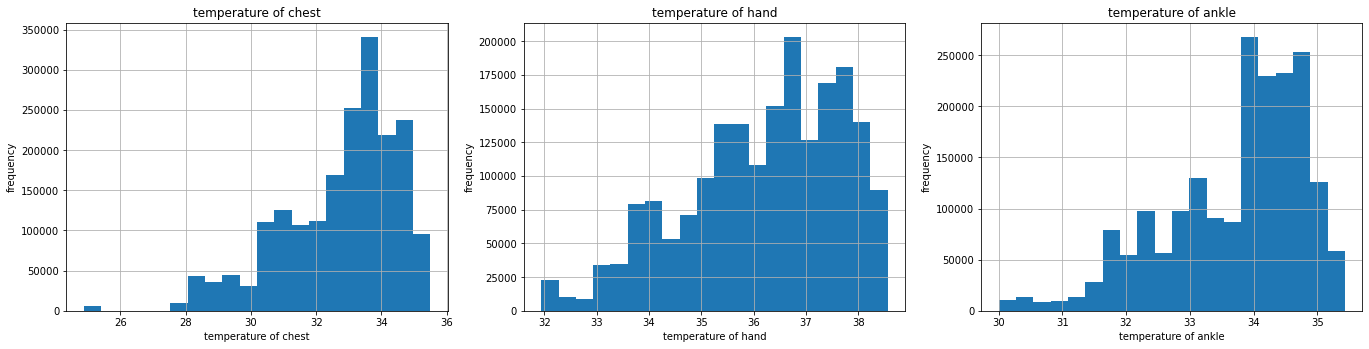

In [30]:
plt.figure(figsize=(6,4))
plt.subplots_adjust(2,1,5,2)

plt.subplot(131)


phydata.handTemperature.hist(bins=20)
#dat0.price.plot(kind="hist",color='lightblue')
plt.xlabel("temperature of chest")
plt.ylabel("frequency")
plt.title('temperature of chest')
plt.subplot(132)
phydata.chestTemperature.hist(bins=20)
#dat0.price.plot(kind="hist",color='lightblue')
plt.xlabel("temperature of hand")
plt.ylabel("frequency")
plt.title('temperature of hand')
plt.subplot(133)
phydata.ankleTemperature.hist(bins=20)
#dat0.price.plot(kind="hist",color='lightblue')
plt.xlabel("temperature of ankle")
plt.ylabel("frequency")
plt.title('temperature of ankle')

I will change the activityId into string values by mapping the activityId values in the activityIDdict dictionary.

In [80]:
phydatacop=train_df.copy()
phydatacop.activityID=phydatacop.activityID.apply(lambda x:activityIDdict[x])
phydatacop
phydatacop[phydatacop['subject_id']==2]

,timestamp,activityID,heartrate,handTemperature,hand_acc16_1,hand_acc16_2,hand_acc16_3,hand_acc6_1,hand_acc6_2,hand_acc6_3,...,ankle_acc6_1,ankle_acc6_2,ankle_acc6_3,ankle_gyro1,ankle_gyro2,ankle_gyro3,ankle_magne1,ankle_magne2,ankle_magne3,subject_id
312921,767.77,standing,90.0,34.1875,-8.52981,4.712060,0.358276,-8.25446,4.95516,0.791698,...,9.716540,-1.511980,-1.006870,0.079272,-0.003718,-0.076595,-18.7246,-16.879600,36.806500,2
361462,1390.52,vacuum_cleaning,104.0,34.5000,-13.05990,3.072090,-0.319846,-12.22260,3.66895,-0.228277,...,9.554430,0.887316,6.811180,-0.159734,0.220180,-0.075913,-15.0970,-1.865220,26.292000,2
349829,1193.29,ironing,84.0,34.4375,7.31548,2.473040,5.722000,7.62250,2.44408,5.930320,...,9.390110,-2.977860,0.074179,0.068208,-0.089438,-0.004169,-38.0109,21.364500,32.792400,2
460045,3470.56,Nordic_walking,124.0,30.1875,-7.12054,16.305200,8.114730,-13.94170,16.72250,8.171110,...,16.377667,-6.851763,-2.755530,-3.576713,0.851214,-2.267850,-23.9823,-23.680833,-2.502126,2
342307,1118.07,ironing,84.0,34.3750,-5.11778,6.224200,6.947140,-4.93868,5.55662,7.431330,...,9.882050,-0.317092,-1.026730,0.275667,-0.392800,-0.301082,-40.2248,5.940340,37.102000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368034,1456.24,vacuum_cleaning,98.0,34.5000,-7.91946,0.761547,4.614360,-7.57998,-1.23791,4.806280,...,9.609180,-0.620355,-1.599440,0.186945,0.002653,-0.035290,-11.6386,-20.898600,4.523240,2
253021,85.84,lying,87.0,33.5625,6.91583,3.048350,6.060460,7.16291,3.06686,6.216340,...,-0.447090,-9.456720,-2.501390,-0.041407,-0.000295,-0.013074,-12.7842,22.638600,-6.019310,2
427131,3017.77,walking,123.0,31.1875,-5.27618,1.478520,2.265320,-5.39451,1.40183,2.140530,...,14.693100,-3.067400,0.091707,-3.903790,1.002250,-2.447160,-39.2733,-18.187900,15.175600,2
471794,3648.85,cycling,120.0,29.7500,-6.10533,3.427980,7.365140,-6.57784,4.30145,9.142140,...,10.602400,-2.752050,-1.022720,0.154275,0.059888,0.106166,-41.1119,5.348810,8.881400,2


# Heatmap Generation

I will generate heatmap for train_data.

In [98]:
from pandas.plotting import scatter_matrix
def generate_heatmap(df):
    #Function : generate_heatmap : function to generate heatmap for the dataframe train_data
    #parameter : train_data : dataframe
    #import seaborn as sns
    
    df_corr = df.corr()
    df_corr = df_corr.drop(['activityID'], axis = 1)

    f, ax = plt.subplots(figsize=(15, 10))
    sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=bool), cmap = "BrBG",ax=ax)
    plt.show()

Heat map is graphical representation of the data in the form of coloured matrix. Heatmap can be used to show statistical similarity  and correlation among the columns.

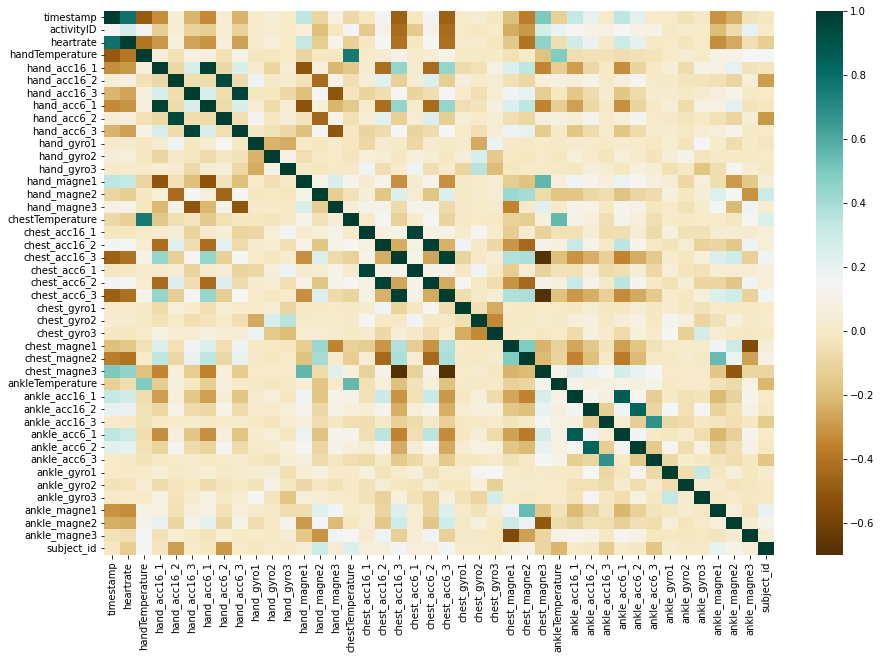

In [100]:
generate_heatmap(train_df)

# Activity - Time and HeartRate Analysis

Now I will concentrate on exploring the time related to activities for each subject 

In [103]:
def change_millisec(timest):
    calculated_time=timest/100
    return calculated_time

Here I am grouping the data of each subject according to the activity performed by them and calculating the time taken to perform each activity, the mean heartrate for each each task and we obtain dataframe ed.

In [104]:
def heartrate_elaptime(datafr):
    ed1=datafr.groupby(['activityID','subject_id']).agg(elapsedtime=('timestamp', 'size'), mean_hearrate=('heartrate', 'mean'))
    ed1['elapsedsec']=ed1['elapsedtime'].map(change_millisec)
    return ed1

In [105]:
ed= heartrate_elaptime(phydatacop)
ed

elapsedtime  mean_hearrate  elapsedsec
activityID     subject_id                                        
Nordic_walking 1                 10101     139.621696      101.01
               2                 14908     125.738252      149.08
               4                 13778     125.575527      137.78
               5                 13030     124.040097      130.30
               6                 13440     109.198536      134.40
...                                ...            ...         ...
walking        4                 15947     111.816753      159.47
               5                 16024     111.624311      160.24
               6                 12802      97.064585      128.02
               7                 16875     100.059832      168.75
               8                 15651     120.107202      156.51

[91 rows x 3 columns]

Here I plot the scatter plot for the elapsed time and mean heartrate for each subject pursuing different physical activity.

<function matplotlib.pyplot.show(close=None, block=None)>

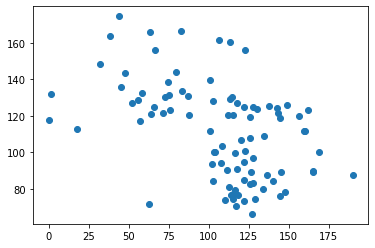

In [97]:
plt.scatter(ed['elapsedsec'],ed['mean_hearrate'])
plt.show

In [107]:
heart=ed['elapsedsec']
ctemp=ed['mean_hearrate']
spearmanr=stats.spearmanr(heart,ctemp)
print("Spearman correlation coefficient is {}".format(spearmanr))

Spearman correlation coefficient is SpearmanrResult(correlation=-0.474120082815735, pvalue=2.0613166734956675e-06)


From the graph we can see that elapsed time is increasing then heartrate decreases.

In [38]:
heart=train_df['heartrate']
ctemp=train_df['chest_magne3']
spearmanr=stats.spearmanr(heart,ctemp)
print("Spearman correlation coefficient is {}".format(spearmanr))

Spearman correlation coefficient is SpearmanrResult(correlation=0.49059399116300434, pvalue=0.0)


Let us consider the time each subject devoted for carrying out different physical activity.

time spend for each activity for subject1



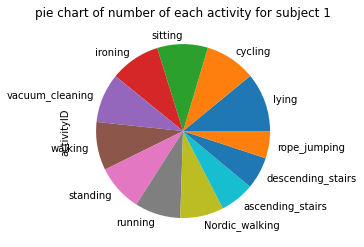

In [132]:
def plotpie(df,sub):
    print('time spend for each activity for subject{}\n'.format(sub))
    plt.title('pie chart of number of each activity for subject {}'.format(sub))
    df.activityID.value_counts().plot(kind='pie')
    df.activityID.agg(['value_counts'])
        
#plt.subplots_adjust(2,1,5,2)
sub1=phydatacop[phydatacop['subject_id']==1]
sub=1
plotpie(sub1,sub)
        

time spend for each activity for subject1



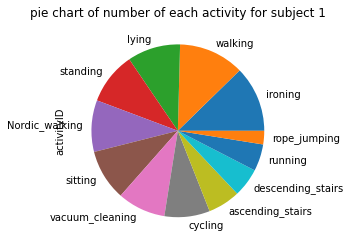

In [120]:
#plt.subplots_adjust(2,1,5,2)
sub1=phydatacop[phydatacop['subject_id']==4]
sub=4
plotpie(phydatacop,sub)

time spend for each activity for subject2



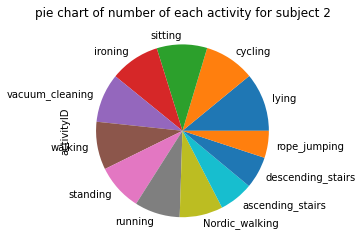

In [114]:
sub2=phydatacop[phydatacop['subject_id']==2]
sub2=2
plotpie(sub1,sub2)

Now we will plot bar graph for each subject the average heartrate while performing different physical activities.

In [115]:
def activity_heartrate(train_data,sub_id):
    #Function:activity_heartrate() : plot graph based on average heartrate
    #parameters : train_data : dataframe
    #             sub_id: subject_id
    ttrain_data = train_data.loc[(train_data["subject_id"] == sub_id)]
    data_graph = ttrain_data['heartrate'].groupby(ttrain_data['activityID']).mean()
    #data_graph.index = data_graph.index.map(activityIDdict)
    data_graph.plot(kind='bar')

Consider the first subject_id -> subject_id=1 ( a male of age 27 height: 182 weight :83)

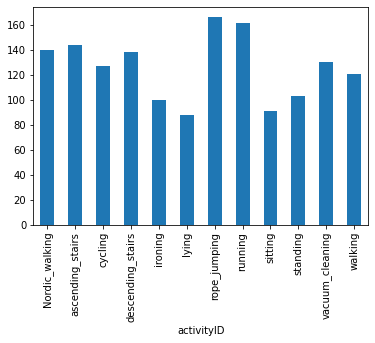

In [133]:
activity_heartrate(phydatacop,1)

Let us also consider the observation when the subjectid=2(a female age:25 height:169 weight:78)

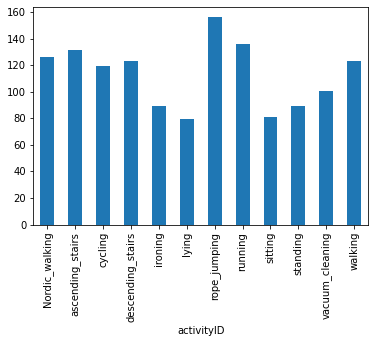

In [118]:
activity_heartrate(phydatacop,2)

Similarly let us now consider another subject_id ,4 ( a male age: 24 height:194 weight:95)

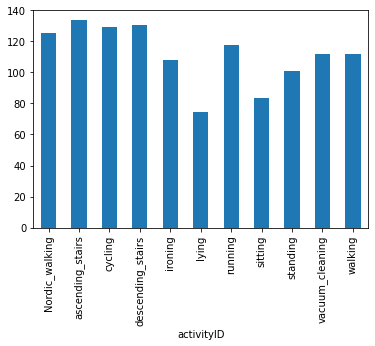

In [119]:
activity_heartrate(phydatacop,4)

Now I will plot a boxplot of the average heartrate measured while performing various physical activities.

In [101]:
import seaborn as sns
def heartrate_boxplot(phydatacop):
    plt.figure(figsize=(7,5))
    plt.subplots_adjust(2,1,5,2)
    plt.subplot(131)
    dat1=phydatacop[['activityID','heartrate']]
    #dat1.activityID=dat1.activityID.astype("category")
    plt.xticks(rotation=40)
    sns.boxplot(x='activityID',y='heartrate',data=dat1)
    plt.ylabel('heartrate')
    plt.xlabel('Activities')
#   plt.title('Activities and Temperature of chest')
    plt.title('heartrate v/s activities')

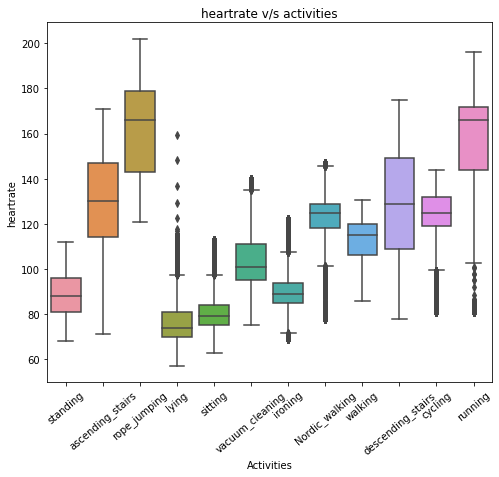

In [102]:
heartrate_boxplot(phydatacop)

Further in the data analysis I will take into consideration the average heartrate while performing activities to state hypothesis.

# Hypothesis Testing

I will be performing the hypothesis testing based on the below scenario

Hypothesis: If the subject is performing cumbersome activities like rope jumping and running then average heartrate of the subject will be more than 110.

Null Hypothesis :The average heartrate of the subject while performing cumbersome activities is less than or equal to 110 

𝐻0  : μ <= 110

Alternate Hypothesis:The average heartrate of the subject while performing cumbersome activities is less than or equal to 110

𝐻1  : μ > 110


Here I am considering the activity running and rope jumping as independent variable and average heartrate as dependent variable. 

In [123]:
running_data = train_df[train_df["activityID"] == 5]
ropejumping_data = train_df[train_df["activityID"] == 24]
cumbersome_data=pd.DataFrame()
cumbersome_data = pd.concat([cumbersome_data,running_data,ropejumping_data], ignore_index=False)
cumbersome_data

,timestamp,activityID,heartrate,handTemperature,hand_acc16_1,hand_acc16_2,hand_acc16_3,hand_acc6_1,hand_acc6_2,hand_acc6_3,...,ankle_acc6_1,ankle_acc6_2,ankle_acc6_3,ankle_gyro1,ankle_gyro2,ankle_gyro3,ankle_magne1,ankle_magne2,ankle_magne3,subject_id
1436799,3466.15,5,176.0,28.0625,-11.614500,12.199200,-5.178400,-18.146800,21.783800,-6.030400,...,24.685000,12.452400,-0.480484,-0.516671,-0.102250,-1.742000,-41.216200,3.27400,28.63310,6
1165461,3392.82,5,152.0,33.8125,-4.625630,-4.954130,0.564829,-4.227810,-5.102200,0.416994,...,11.119500,-5.265060,-2.954690,-0.163015,-0.412381,-3.518760,-19.752800,-35.30170,14.99560,5
1427969,3377.85,5,167.0,28.1875,-32.151100,54.792300,-3.820800,-43.525800,62.126600,-3.238780,...,19.176400,13.552100,-3.073160,-0.252656,0.118389,-2.155950,-44.974600,5.13008,26.91570,6
233529,3313.29,5,173.0,30.4375,-30.378100,53.540200,6.178220,-35.598200,45.132200,4.914560,...,11.916575,-2.005432,-2.950493,-0.130902,0.464649,-1.483988,-45.024525,-50.20960,13.76705,1
1422642,3324.58,5,145.0,28.3125,8.240610,5.953630,1.182600,6.741310,6.221660,1.256810,...,7.763660,0.499046,-1.139180,3.702880,-2.506820,7.659240,-44.596100,2.52040,21.53050,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247533,3602.14,24,181.0,30.1875,-1.027870,7.147790,-4.925800,-1.094920,6.650410,-4.489510,...,2.476990,-2.874380,-0.615926,1.523360,0.133100,2.189300,-51.879500,-34.34670,36.14870,1
511742,4230.05,24,179.0,28.5000,0.634975,-0.968486,1.130520,1.424530,-2.712040,-0.137652,...,7.196820,1.316780,-0.230692,-0.532160,-0.233961,-1.513260,-38.235700,-1.37933,34.65590,2
1184329,3681.75,24,139.0,33.8750,-9.025420,3.777730,1.508630,-8.812540,3.887880,1.821460,...,9.242210,0.678307,-3.236270,-0.143172,-0.223484,-0.306898,-46.121900,19.94060,9.16550,5
501024,4122.87,24,123.0,28.3125,-0.539344,-1.067640,-10.933300,-0.241368,0.023247,-11.120200,...,5.258980,5.559860,6.713020,-0.230153,0.232471,2.192700,-36.096500,-12.53920,30.18710,2


In [140]:
cumbersome_mean=cumbersome_data['heartrate'].mean()
cumbersome_std=cumbersome_data['heartrate'].std()
cumbersome_count=cumbersome_data['heartrate'].count()
cumbersome_std

22.60876807693868

In [143]:
cumbersome_count

73482

In [146]:
z=(cumbersome_mean-110)/(cumbersome_std/np.sqrt(cumbersome_count))
p_value_from_normal=(1-stats.norm.cdf(z))
print('Mean German film budget from data: ',cumbersome_mean)
print ('one tail p value from normal: ', p_value_from_normal)
print ('one tail p value from normal: ', z)


Mean German film budget from data:  158.40277581348565
one tail p value from normal:  0.0
one tail p value from normal:  580.3418016636251


0.0

I will be considering the significance level of 5%.The p_value that I obtained from the z-test is <0.05, that less than probability of null hypothesis will get accepted.Hence, I will reject my null hypothesis which is the average heartrate while subject is performing cumbersome activities is less or equal to than 110. I will accept my alternate hypothesis  that states the average heartrate of the subject while carrying out roping jumping and running is more than 110. 

# Modelling

Here I will be performing modelling to predict the values. I will focus on predicting the heartrate and activity ID. I will use Polynomial Regression to predict the heartrate using the IMU readings of the chest. First I will calculate Pearson correlation coefficient among the different attributes. 

In [27]:
phydata.corr()

,timestamp,activityID,heartrate,handTemperature,hand_acc16_1,hand_acc16_2,hand_acc16_3,hand_acc6_1,hand_acc6_2,hand_acc6_3,...,ankle_acc6_1,ankle_acc6_2,ankle_acc6_3,ankle_gyro1,ankle_gyro2,ankle_gyro3,ankle_magne1,ankle_magne2,ankle_magne3,subject_id
timestamp,1.000000,0.145244,0.781018,-0.490511,-0.326419,0.035387,-0.215841,-0.337584,0.032966,-0.225717,...,0.341460,0.221526,0.002138,0.001015,-0.038416,0.001527,-0.307658,-0.236989,-0.041782,-0.021916
activityID,0.145244,1.000000,0.266168,0.161482,-0.132573,0.040441,-0.116720,-0.132422,0.044040,-0.117646,...,0.147599,0.106010,0.099209,-0.005895,0.010039,0.002653,-0.200735,-0.069130,0.209294,-0.000546
heartrate,0.781018,0.266168,1.000000,-0.392719,-0.304767,0.061473,-0.268230,-0.314024,0.059788,-0.277322,...,0.296503,0.217162,-0.010363,0.000925,-0.022244,0.005877,-0.325040,-0.249641,-0.057358,-0.128235
handTemperature,-0.490511,0.161482,-0.392719,1.000000,0.060560,-0.048200,0.076189,0.074848,-0.044556,0.091445,...,-0.058351,-0.052726,-0.037033,-0.002130,0.029378,0.001300,0.090922,0.112931,0.154702,0.152991
hand_acc16_1,-0.326419,-0.132573,-0.304767,0.060560,1.000000,-0.075153,0.258193,0.977927,-0.072598,0.261183,...,-0.322109,-0.097172,-0.017180,0.043247,-0.070603,0.095700,0.082812,0.207467,-0.042793,-0.034171
hand_acc16_2,0.035387,0.040441,0.061473,-0.048200,-0.075153,1.000000,-0.064802,-0.063314,0.943875,-0.065532,...,0.065009,0.123091,0.010547,-0.005346,-0.037732,-0.047358,-0.049515,-0.098225,0.041686,-0.280354
hand_acc16_3,-0.215841,-0.116720,-0.268230,0.076189,0.258193,-0.064802,1.000000,0.255113,-0.064305,0.965348,...,-0.163218,-0.072858,0.024442,0.013903,-0.010423,0.024114,0.060617,0.109933,-0.011914,-0.002883
hand_acc6_1,-0.337584,-0.132422,-0.314024,0.074848,0.977927,-0.063314,0.255113,1.000000,-0.069088,0.258474,...,-0.317713,-0.098036,-0.017108,0.043473,-0.069087,0.085104,0.084416,0.212333,-0.039334,-0.032079
hand_acc6_2,0.032966,0.044040,0.059788,-0.044556,-0.072598,0.943875,-0.064305,-0.069088,1.000000,-0.054614,...,0.059645,0.127686,0.013536,-0.002637,-0.038893,-0.021830,-0.053114,-0.100473,0.044490,-0.299409
hand_acc6_3,-0.225717,-0.117646,-0.277322,0.091445,0.261183,-0.065532,0.965348,0.258474,-0.054614,1.000000,...,-0.168814,-0.071399,0.024410,0.014917,-0.009964,0.027247,0.061756,0.113399,-0.009567,0.003545


# Polynomial Regression

From the above obtained dataframe we can notice that readings of chest_magne3 and chest_acc16_2 are more correlated to heartrate than other attributes. So I will take them as dependant variable for polynomial regression. I will create dataframe X with the dependant value. And since we are predicting heartrate from chest_magne3 and chest_acc16_2, I will take heartrate as independent variable and take it as list.

In [147]:
X=phydata[['chest_acc16_2','chest_magne3']]
#phytarget=phydata['heartrate']
tar = phydata['heartrate']

Since the variable are not linearly dependant I will use Polynomial Regression. Polynomial Regression 𝑓(𝑥;𝒘) = 𝑤0 + 𝑤1𝑥 + ⋯ + 𝑤n𝑥n. But here we will take multiple attributes chest_magne3 and chest_acc16_2 as dependent variable. And using PolynomialFeatures we will find the values of dependant variable upto power of n which we will pass as parameter degree. We will convert the features into the power.
Independent Variable : X :- Includes chest_acc16_2,chest_magne3 
Dependent Variable.  : tar :-Includes heartrate

Process involves:
    Transform the independent Variable X by calculatin till nth degree polynomial where n=8
    Obtain train test data by applying train_test_split inbult function to both X and tar.
    Apply poly_reg_model.fit(X_train,y_train) for fitting the data.
    Hence the corresponding model is created.

    later on,
    we compute the root mean squared error and the mean squared error inoerder to
    obtain the error.
    I have also provided an example for the same considering two values of X from the dataframe and
    prected the heart rate.

In [148]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=8, include_bias=False)
poly_features = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, tar, test_size=0.4,train_size=0.6,random_state=4798)

In [149]:
from sklearn.linear_model import LinearRegression
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)

LinearRegression()

In [150]:
poly_reg_y_predicted = poly_reg_model.predict(X_test)
from sklearn.metrics import mean_squared_error
poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))
print('The root mean squared error is {}'.format(poly_reg_rmse))
poly_mse=mean_squared_error(y_test, poly_reg_y_predicted)
print('The mean squared error is {}'.format(poly_mse))
poly_feat = poly.fit_transform([[1.930140,-54.463000]])
predict_heart= poly_reg_model.predict(poly_feat)
predict_heart

The root mean squared error is 21.4802172441862
The mean squared error is 461.3997328574342


array([93.77671844])

# Random Forest Algorithm

Random Forest algorithm can be used for both classification and regression which makes it a very versatile modelling algorithm. As the name implies, Random Forest is a forest of trees, decision trees which are randomly populating the forest. The algorithms creates and combines decision trees together, the more trees in the forest, the better the accuracy of its predictions will be.

The process involves:

A dataframe data created by dropping activityID and timestamp and target which includes activityID
Train test data split is done for both data_1 and target

Import RandomForestClassifier and create a gaussian classifier clf and train the model
Obtain the root mean sqaured error
Accuracy of the model is also obtained

In [152]:
data=phydata.drop(['activityID','timestamp'], axis=1)
target = phydata['activityID']
train_data,test_data,train_target,test_target = cross_validation.train_test_split(data,target,test_size=0.4,train_size=0.6,random_state=12345)

In [153]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(train_data,train_target)

y_pred=clf.predict(test_data)

In [36]:
rand_rmse = np.sqrt(mean_squared_error(test_target, y_pred))
print('The root mean squared error for Random Forest Classifier is {}'.format(rand_rmse))

The root mean squared error for Random Forest Classifier is 0.5945502741484764


In [37]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_target, y_pred))

Accuracy: 0.9942450142450142


In [38]:
tes=phydata[phydata['subject_id']==3]
tes

,timestamp,activityID,heartrate,handTemperature,hand_acc16_1,hand_acc16_2,hand_acc16_3,hand_acc6_1,hand_acc6_2,hand_acc6_3,...,ankle_acc6_1,ankle_acc6_2,ankle_acc6_3,ankle_gyro1,ankle_gyro2,ankle_gyro3,ankle_magne1,ankle_magne2,ankle_magne3,subject_id
46281,166.17,1,91.0,31.0000,-2.316980,6.75346,9.18109,-2.117760,6.23230,8.86153,...,9.71673,1.013740,-1.136080,-0.637220,-0.074219,0.113066,-42.6776,0.574123,57.4883,3
46282,166.27,1,91.0,31.0000,-1.353890,6.39038,7.61876,-1.773730,6.68216,8.09006,...,10.01330,2.812390,-2.187770,-0.113422,-0.545321,-0.572943,-40.8283,-2.814860,58.5511,3
46283,166.39,1,91.0,31.0000,-1.201360,4.68530,8.01167,-1.409040,5.19955,8.13824,...,9.17755,1.165330,-0.755322,-0.285889,-0.552679,-0.619155,-36.2752,-6.535780,60.8259,3
46284,166.49,1,91.0,31.0000,-0.737192,5.06320,8.24827,-0.504560,5.11760,8.24319,...,8.42732,0.227757,-0.475887,-0.315613,-0.332036,-0.107497,-32.9984,-7.554590,62.3974,3
46285,166.60,1,90.0,31.0000,-0.403772,5.05890,8.06084,-0.264815,5.10063,8.09198,...,10.78790,2.436960,-0.132287,0.113989,-0.085076,0.448154,-32.5742,-5.913210,62.2877,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62117,2442.74,4,122.0,28.6875,-2.452420,10.29660,-1.99423,-2.383700,10.40740,-1.97459,...,9.32376,3.013710,1.765540,2.046050,0.147897,-0.698613,-21.0772,-8.924000,8.5653,3
62118,2442.85,4,122.0,28.6875,-2.901860,9.16494,-1.65076,-3.237720,8.96402,-1.71384,...,6.60552,2.838120,-5.257340,3.574080,-0.051112,-0.386876,-20.5655,-10.445800,13.8674,3
62119,2442.96,4,122.0,28.6875,-2.406590,9.73024,-1.64525,-2.536620,9.59354,-1.41392,...,8.25500,4.898860,-2.502980,-0.972910,0.007421,0.657275,-20.3344,-10.249600,15.1054,3
62120,2443.07,4,122.0,28.6875,-1.759920,10.90040,-1.75497,-2.047700,10.93360,-1.97609,...,10.66470,2.027690,-0.841671,-0.127264,-0.057552,0.961383,-21.0434,-8.333120,13.8938,3


In [39]:
tes=phydata.iloc[[62117]]
tes1=tes.drop(['activityID','timestamp'], axis=1)
pred=clf.predict(tes1)
pred

array([4], dtype=int64)

# Conclusion

Let us divide the process into four phases:

After loading all the required files into a data frame (datafr)

   Phase 1 : Data cleaning
              Using function data_cleaning() cleaning is carried out
              and we are provide with an output dataframe(data)

   Phase 2 : Exploratory data Analysis
              Various EDA Analysis is done on the dataframe (data)
              It includes correlation analysis which provided as with conclusion there is no linear
              correlation
              we also did the activity - time heartrate analysis and we obtained the scatterplot with clusters
              Again, we performed activity heartrate analysis and plotted bar graph for a couple of subjectids
              and  figured out that heartrate depends on the intensity of actvities performed.

   Phase 3 : Hypothesis Testing
             In this phase,based on my EDA Analysis I created a hypothesis that which contexts as the
             intensity of actvity impacts the heartrate.
             The ztest is carried out as we are dealing with large amount of data and the result favours my
             hypothesis.
             hence all the intense activities can be accepted which includes running and rope jumping and rest
             can be rejected.

  Phase  4:  Modelling
             The prediction is carried out using two methods
             Polynomial regression and Random Forest algorithm
             An example for each is provided and both predictions are succesful.
Finally, we have performed all the requirements where all the above mentioned phases are completed succesfully.